<a href="https://colab.research.google.com/github/fabnancyuhp/RENDUPYTHONISFSTAT/blob/master/EXO3P104.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import pickle

assurance = pd.read_pickle("C:/Users/trieu/OneDrive/Documents/M2 ISF/Python/insurance.pkl")
assurance.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [0]:
#On s'intéresse à la distribution des variables, à leurs valeurs statistiques afin de mieux se rendre compte de l'effet échelle
assurance.describe()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.494768,0.505232,0.795217,0.204783,0.242152,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.500160,0.403694,0.403694,0.428546,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
#On sépare les variables explicatives de la variable Y
var_explicatives = [o for o in assurance.columns if o!='charges']
X = assurance[var_explicatives]
Y = assurance['charges']
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


# QUESTION 1

In [0]:
#On crée un échantillon test correspondant à 20%
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20,random_state=2003)

# QUESTION 2

In [0]:
#On scale car on constate des différences d'échelle dans la distribution des variables
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()
scal.fit(X_train)
X_train_scal = scal.transform(X_train)
X_test_scal = scal.transform(X_test)

# QUESTION 3 

In [0]:
#On entraîne notre modèle
from sklearn.svm import SVR
SVMR = SVR(kernel='linear',C=200,gamma=0.08, epsilon=1) 
SVMR.fit(X_train_scal,Y_train)

SVR(C=200, cache_size=200, coef0=0.0, degree=3, epsilon=1, gamma=0.08,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# QUESTION 4

In [0]:
from sklearn.metrics import r2_score
print("R2 score ="+str(r2_score(Y_test,SVMR.predict(X_test_scal))))

#On constate que le R2 score est relativement plus élevé que la moyenne, ce qui est correct

R2 score =0.746032637386953


# QUESTION 5

In [0]:
#On entraîne le modèle
from sklearn.svm import SVR
SVMRPOLY = SVR(kernel='poly', degree=3,C=800,epsilon=1) 
SVMRPOLY.fit(X_train_scal,Y_train)

SVR(C=800, cache_size=200, coef0=0.0, degree=3, epsilon=1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

4) On va tracer sur un même graphique:
• le score r2 d’un SVR sur l’ensemble d’apprentissage en fonction du degree du polynome
• le score r2 du même SVR l’ensemble de test en fonction du degree du polynome
Les autres paramêtres sont constants: kernel=’poly’, C=800, epsilon=1.

In [0]:
r2_score(Y_test,SVMR.predict(X_test_scal))

0.746032637386953

# QUESTION 6

In [0]:
#On calcule les 2 R2 sur test et train pour 10 degrés
Degrees=[]
R2_train=[]
R2_test=[]
for i in range(10):
    SVMRPOLY = SVR(kernel='poly', degree=i+1,C=800,epsilon=1) 
    SVMRPOLY.fit(X_train_scal,Y_train)
    Degrees.append(i+1)
    R2_test.append(r2_score(Y_test,SVMRPOLY.predict(X_test_scal)))
    R2_train.append(r2_score(Y_train,SVMRPOLY.predict(X_train_scal)))

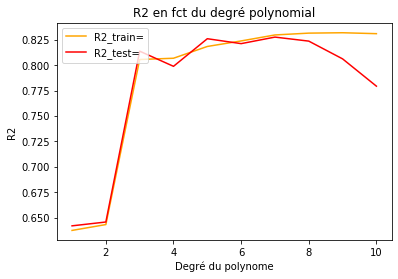

In [0]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(Degrees,R2_train,color='orange',label='R2_train=')
plt.plot(Degrees,R2_test,color='red',label='R2_test=')
plt.title("R2 en fct du degré polynomial")
plt.xlabel("Degré du polynome")
plt.ylabel("R2")
plt.legend(loc="upper left")
plt.show()